In [4]:
%addpath ..
%reload gym_extensions.base
%reload gym_extensions.utils
%reload gym_extensions.policies
%reload gym_extensions.value_functions.base
%reload gym_extensions.value_functions.linear
%reload gym_extensions.value_functions
%reload gym_extensions.algorithms.base
%reload gym_extensions.algorithms.td0
%reload gym_extensions.algorithms


import gym
from gym_extensions.value_functions import LinearQ, LinearV
from gym_extensions.algorithms import Sarsa, QLearning, ValueTD0
from gym_extensions.policies import PolicyQ

env = gym.make('CartPole-v0')
q = LinearQ(env, polynomial_degree=2)
v = LinearV(env, polynomial_degree=2)
p = PolicyQ(q)
algo_q = Sarsa(q, alpha=0.05, gamma=0.8)
algo_v = ValueTD0(v, alpha=0.05, gamma=0.8)

consecutive_successes = 0

for episode in range(1000):
    
    # init
    s = env.reset()
    a = env.action_space.sample()
    ret = 0  # total return (accumulated reward)

    for t in range(500):
        # env.render()
        s_next, r, done, _ = env.step(a)
        a_next = p.greedy(s_next)
        ret += r
        
        # if episode finished unsuccessfully, we'll hand in some of our return
        if done and t < 199:
            r = -5

        # update Q-function
        algo_q.update(s, a, r, s_next, a_next)
        algo_v.update(s, r, s_next)
        

        if done:
            if t == 199:
                consecutive_successes += 1
                print(f"episode={episode+1},  t={t+1}, consecutive_successes={consecutive_successes}")
            else:
                consecutive_successes = 0
                print(f"episode={episode+1},  t={t+1}, failed")
            break

        # prepare for next timestep
        s, a = s_next, a_next
        
    if consecutive_successes == 10:
        p.to_file('data/CartPole-v0.policy')
        break

env.close()

'..' already existed in sys.path, skipping
module reloaded: gym_extensions.base
module reloaded: gym_extensions.utils
module reloaded: gym_extensions.policies
module reloaded: gym_extensions.value_functions.base
module reloaded: gym_extensions.value_functions.linear
module reloaded: gym_extensions.value_functions
module reloaded: gym_extensions.algorithms.base
module reloaded: gym_extensions.algorithms.td0
module reloaded: gym_extensions.algorithms
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
episode=1,  t=12, failed
episode=2,  t=12, failed
episode=3,  t=50, failed
episode=4,  t=51, failed
episode=5,  t=30, failed
episode=6,  t=27, failed
episode=7,  t=74, failed
episode=8,  t=48, failed
episode=9,  t=44, failed
episode=10,  t=36, failed
episode=11,  t=143, failed
episode=12,  t=46, failed
episode=13,  t=36, failed
episode=14,  t=45, failed
episode=15,  t=115, failed
episode=16,  t=64, failed
episode=17,  t=45, failed
episode=18,  

episode=292,  t=122, failed
episode=293,  t=173, failed
episode=294,  t=74, failed
episode=295,  t=44, failed
episode=296,  t=62, failed
episode=297,  t=56, failed
episode=298,  t=99, failed
episode=299,  t=73, failed
episode=300,  t=70, failed
episode=301,  t=60, failed
episode=302,  t=152, failed
episode=303,  t=64, failed
episode=304,  t=84, failed
episode=305,  t=51, failed
episode=306,  t=67, failed
episode=307,  t=50, failed
episode=308,  t=94, failed
episode=309,  t=68, failed
episode=310,  t=52, failed
episode=311,  t=77, failed
episode=312,  t=114, failed
episode=313,  t=126, failed
episode=314,  t=54, failed
episode=315,  t=86, failed
episode=316,  t=73, failed
episode=317,  t=64, failed
episode=318,  t=65, failed
episode=319,  t=46, failed
episode=320,  t=200, consecutive_successes=1
episode=321,  t=200, consecutive_successes=2
episode=322,  t=200, consecutive_successes=3
episode=323,  t=101, failed
episode=324,  t=84, failed
episode=325,  t=60, failed
episode=326,  t=56, fa

In [6]:
env = gym.make('CartPole-v0')
p = PolicyQ.from_file('data/CartPole-v0.policy')

for episode in range(10):
    
    # init
    s = env.reset()
    a = env.action_space.sample()

    for t in range(500):
        env.render()
        s_next, r, done, _ = env.step(a)
        a_next = p.greedy(s_next)

        if done:
            print(f"t={t+1}")
            break

        s, a = s_next, a_next
        
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
t=200
t=200
t=200
t=200
t=200
t=200
t=200
t=200
t=200
t=200


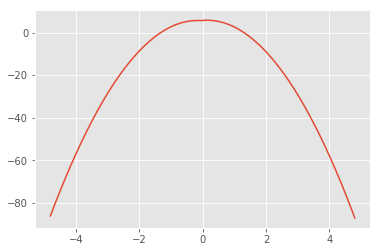

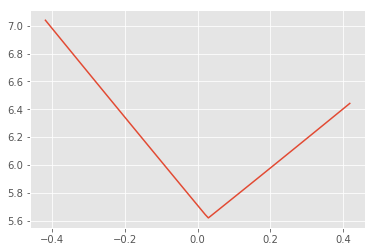

In [40]:
i = 0
qs = []
xs = np.linspace(q.env.observation_space.low[i], q.env.observation_space.high[i], 100)
s = np.zeros(4)

for x in xs:
    s[i] = x
    a = p.greedy(s)
    qs.append(q(s, a))
    
plt.plot(xs, qs)
plt.show()

i = 2
qs = []
xs = np.linspace(q.env.observation_space.low[i], q.env.observation_space.high[i], 100)
s = np.zeros(4)

for x in xs:
    s[i] = x
    a = p.greedy(s)
    qs.append(q(s, a))
    
plt.plot(xs, qs)

